<center>
<img src="logo.png" height="900"> 
</center>


#  Простые симуляции

В этом задании мы решим несколько простых задачек на симуляции. 

In [1]:
import numpy as np
import scipy.stats as sts
import matplotlib.pyplot as plt

## Упражнение 1 (распределение Пуассона)

Случайная величина $X$ имеет распределение Пуассона с $\lambda = 2$,  $X \sim Pois(2)$. С помощью $10^6$ симуляций оцените: 

* $P(X > 6)$
* $P(X > 6 \mid X > 5)$
* $P(X > 5, X < 7)$
* $E(X^3)$ 
* $E(X \mid X > 5)$

__Под чёрточками имеется в виду условная вероятность!!!__

Вбейте получившиеся ответы в переменные `ans1`, `ans2`, $\ldots$, `ans5`. 

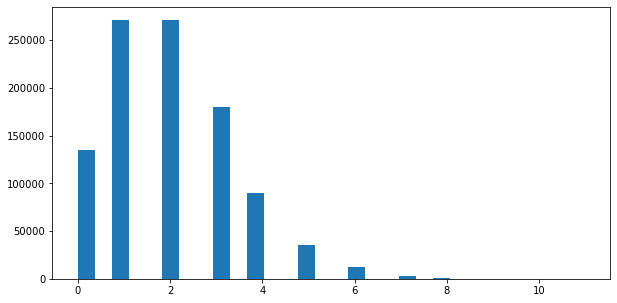

In [2]:
n_obs = 10**6
pois_dist = sts.poisson(2)
x = pois_dist.rvs(10**6)


plt.figure(figsize=(10, 5))
plt.hist(x, bins=30);

In [3]:
success_1 = x > 6
ans1 = np.sum(success_1) / n_obs
print(ans1)

uslovie_2 = x > 5
success_2 = x[uslovie_2] > 6
ans2 = np.sum(success_2) /np.sum(uslovie_2)
print(ans2)

success_3 = (x>5) & (x<7)
ans3 = np.sum(success_3) / n_obs
print(ans3)

success_4 = x**3 
ans4 = success_4.mean()
print(ans4)

uslovie_5 = x > 5
success_5 = x[uslovie_5]
ans5 = x[uslovie_5].mean()
print(ans5)


0.004501
0.27247412070948607
0.012018
21.947224
6.356861795508203


In [4]:
# проверка, что задание решено корректно
assert np.abs(ans3 - 0.01) < 1e-2

# Похожие тесты скрыты от вас

## Упражнение 2 (нейросети)

Юра завёл себе две нейронные сетки и два сервера для их обучения. Две нейросети обучаются независимо на двух серверах. Время их обучения $T_1$ и $T_2$ равномерно распределено на отрезке $[1;3]$ (обучение измеряется в часах). В процессе обучения сервер может упасть. Момент падения сервера $T$ распределён экспоненциально с параметром $\lambda = 0.3$. Он не зависит от времени обучения нейросеток. 

Известно, что одна из нейросетей успела обучиться, а вторая не успела. Какова вероятность того, что $T \le 1.5$? Ответ вбейте в переменную `ans6`. При симуляциях для генерации момента подения используйте для обоих серверов одну и ту же случайную величину. 

**Hint:** при решении задачи помните о том, что у вас две нейросетки!

In [5]:
fall = sts.expon(scale=1/0.3)
sample_fall = fall.rvs(10**6)

times = sts.uniform(1, 2)
sample_1 = times.rvs(10**6)
sample_2 = times.rvs(10**6)

uslovie = (((sample_1 < sample_fall) & (sample_2 >= sample_fall)) 
           | ((sample_1 >= sample_fall) & (sample_2 < sample_fall)))
ans6 = (sample_fall[uslovie] <= 1.5).mean()
ans6

0.18907030090406152

In [6]:
# проверка, что задание решено корректно
assert ans6 < 0.2
assert ans6 > 0.1

# Похожие тесты скрыты от вас

## Упражнение 3 (квантильное преобразование)

Случайная величина $X$ описывается функцией распределения: 

$$
F(x) = \left( \frac{\ln x}{\ln \theta} \right)^{\alpha},  \quad x \in [1; \theta]
$$

Сгенерируйте из такого распределения выборку объёма $10^6$ и оцените математическое ожидание данной случайной величины. Запишите его в переменную `ans7`. В качестве параметров возьмите $\alpha=2, \theta = 10$.

In [7]:
dist = sts.uniform(0, 1)
x = dist.rvs(10**6)

y = np.exp(np.log(10) * np.sqrt(x))
ans7 = y.mean()

Нарисуйте для получившегося распределения гистограмму. Найдите в аналитическом виде плотность распределения. Нанесите её на картинку с гистограммой. 

In [8]:
def x_dist_pdf(x):
    return (2 * np.log(x)/ (x * (np.log(10)**2)))

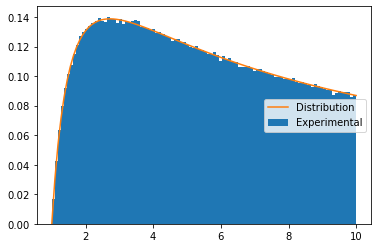

In [9]:
x = np.linspace(1, 10, 100)
fig, ax = plt.subplots()
ax.hist(y, bins=100, density=True, label='Experimental')
ax.plot(x, x_dist_pdf(x), label='Distribution')
plt.legend(loc='right');

In [10]:
# проверка, что задание решено корректно
assert ans7 < 6
assert ans7 > 2

# Похожие тесты скрыты от вас

## Упражнение 4 (сходимость по вероятности)

__Это задание никак не оценивается.__ У распределения хи-квадрат есть следующее свойство: если $X_1, \ldots, X_n \sim iid~N(0,1)$, тогда имеет место следующая сходимость по веротяности:

$$
\frac{\chi^2_n}{n} = \frac{X_1^2 + \ldots + X_n^2}{n} \to  1
$$

Продемонстрируйте с помощью симуляций, что это именно так. От вас требуется построить ту же картинку, что мы строили при иллюстрации ЗБЧ в лекции. Не забудьте построить для нескольких разных $\varepsilon$ коридоры и убедиться, что последовательность с некоторого момента начинает пробивать их довольно редко.

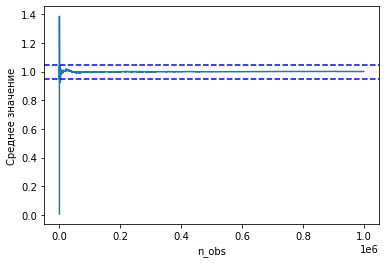

In [11]:
n_obs = 10**6
dist = sts.norm()
sample = dist.rvs(size=n_obs )

summ = np.cumsum(sample**2)
count = np.arange(1, n_obs+1)

eps = 0.05
plt.plot(count, summ / count)
plt.axhline(1 - eps, ls='--', c='blue')
plt.axhline(1 + eps, ls='--', c='blue')
plt.xlabel('n_obs')
plt.ylabel('Среднее значение');